# 3장 사이킷런 알고리즘
## 서포트벡터머신, 의사결정트리

In [1]:
# 명령 결과 모두 보기
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# 버전 경고 무시
import warnings
warnings.filterwarnings('ignore')

# 판다스와 넘피
import pandas as pd
import numpy as np

# 그림 그리기
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
get_ipython().run_line_magic('matplotlib', 'inline')
plt.rcParams['font.family']='Malgun Gothic' # 한글폰트

# 자료 스케일링
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# 모델 선택
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# 성능지표
from sklearn.metrics import accuracy_score, plot_roc_curve 
from sklearn.metrics import plot_confusion_matrix, classification_report

# 파이프라인
from sklearn.pipeline import Pipeline, make_pipeline

# 시각화 툴
import scikitplot as skplt

# 모델저장
from joblib import dump, load

# 3. SVC

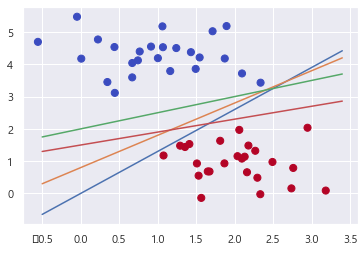

In [2]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='coolwarm');
X_fit = np.arange(-0.5, 3.5, 0.1)
plt.plot(X_fit, X_fit*1.3); plt.plot(X_fit, 0.8+X_fit*1);
plt.plot(X_fit, 2+X_fit*0.5);plt.plot(X_fit, 1.5+X_fit*0.4)

In [3]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim(); ylim = ax.get_ylim()
    x = np.linspace(xlim[0], xlim[1], 30); y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    ax.contour(X, Y, P, colors='k', levels=[-1, 0, 1], 
               alpha=0.5, linestyles=['--', '-', '--'])
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
                 s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim); ax.set_ylim(ylim)

SVC(kernel='linear', random_state=11)

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

array([[ 0.22967329, -1.37758262]])

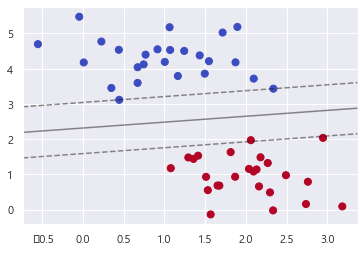

In [4]:
from sklearn.svm import SVC 
model = SVC(kernel='linear', random_state=11)
model.fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='coolwarm')
plot_svc_decision_function(model);
model.support_vectors_; 
model.coef_

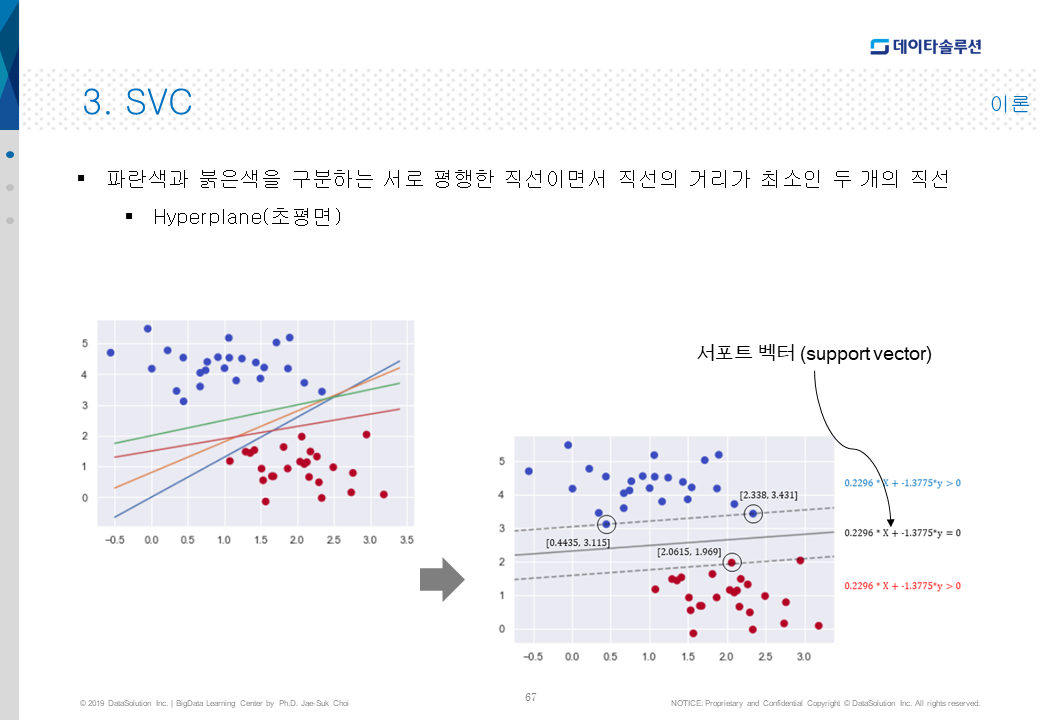

In [5]:
from IPython.display import Image
width = 800; height = 600
Image(filename='../img/슬라이드67.png', width=width, height=height)

## Kernel computaion, 내적의 합 kernel, 표준공분산도 커널의 일종

In [6]:
x = np.array([1,2,3])
y = np.array([4,5,6])

x_t = x.reshape(-1,1); x = x.reshape(1,-1)
q_x = x_t@x
q_x

y_t = y.reshape(-1,1); y = y.reshape(1,-1)
q_y = y_t@y
q_y

q_x * q_y
(q_x * q_y).sum()

x = np.array([1,2,3]); y = np.array([4,5,6])
sum((x*y))**2 # kernel function
np.dot(x,y)**2

array([[1, 2, 3],
       [2, 4, 6],
       [3, 6, 9]])

array([[16, 20, 24],
       [20, 25, 30],
       [24, 30, 36]])

array([[ 16,  40,  72],
       [ 40, 100, 180],
       [ 72, 180, 324]])

1024

1024

1024

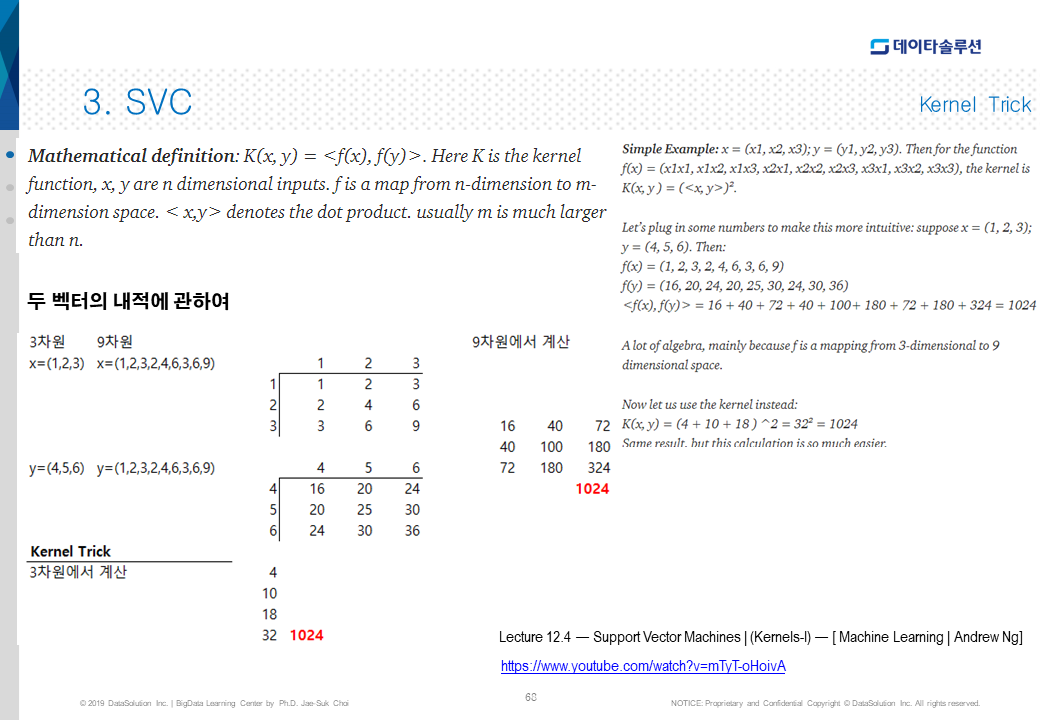

In [7]:
from IPython.display import Image
width = 800; height = 600
Image(filename='../img/슬라이드68.png', width=width, height=height)

## Kernel과 Basis function

Text(0.5, 0, 'x1')

Text(0, 0.5, 'x2')

Text(0.5, 1.0, 'Problem')

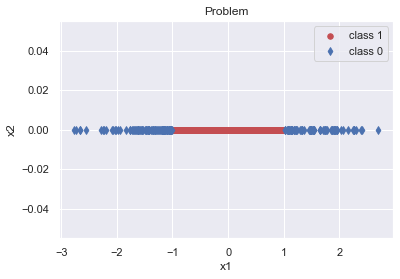

In [8]:
sns.set(); np.random.seed(0)
X = np.random.randn(500)
tr = 1
X_pos = X[np.logical_and(X<tr, X>-tr)]
X_neg = X[np.logical_or(X>=tr, X<=-tr)]
plt.scatter(X_pos, y=X_pos*0, c='r', marker='o', label='class 1', s=30)
plt.scatter(X_neg, y=X_neg*0, c='b', marker='d', label='class 0', s=30)
plt.legend(); plt.xlabel('x1'); plt.ylabel('x2'); plt.title('Problem')

Text(0.5, 0, '$\\phi_1$')

Text(0, 0.5, '$\\phi_2$')

Text(0.5, 1.0, 'Problem solving in Transformed higer Space')

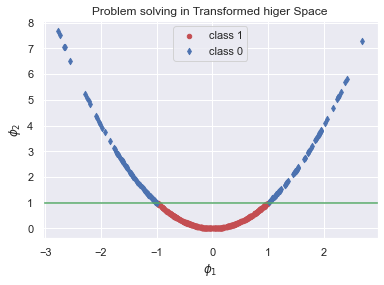

In [9]:
plt.scatter(X_pos, y=X_pos**2, c='r', marker='o', label='class 1', s=20)
plt.scatter(X_neg, y=X_neg**2, c='b', marker='d', label='class 0', s=20)
plt.legend(); plt.xlabel(r'$\phi_1$'); plt.ylabel(r'$\phi_2$')
plt.title('Problem solving in Transformed higer Space')
plt.axhline(y= tr, color='g', linestyle='-')

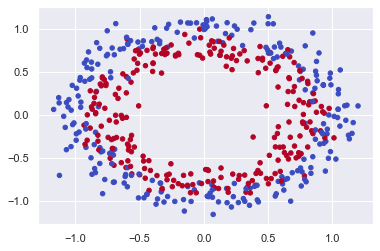

In [10]:
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=500, random_state=11, noise=0.1)
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, cmap='coolwarm');

<Figure size 576x432 with 0 Axes>

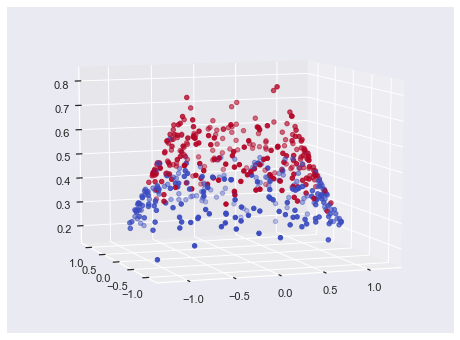

In [11]:
from mpl_toolkits import mplot3d
r = np.exp(-(X ** 2).sum(1))
plt.figure(figsize=(8,6))
ax = plt.axes(projection='3d')
ax.scatter3D(X[:, 0], X[:, 1], r, c=y, cmap='coolwarm')
ax.view_init(10, 250)

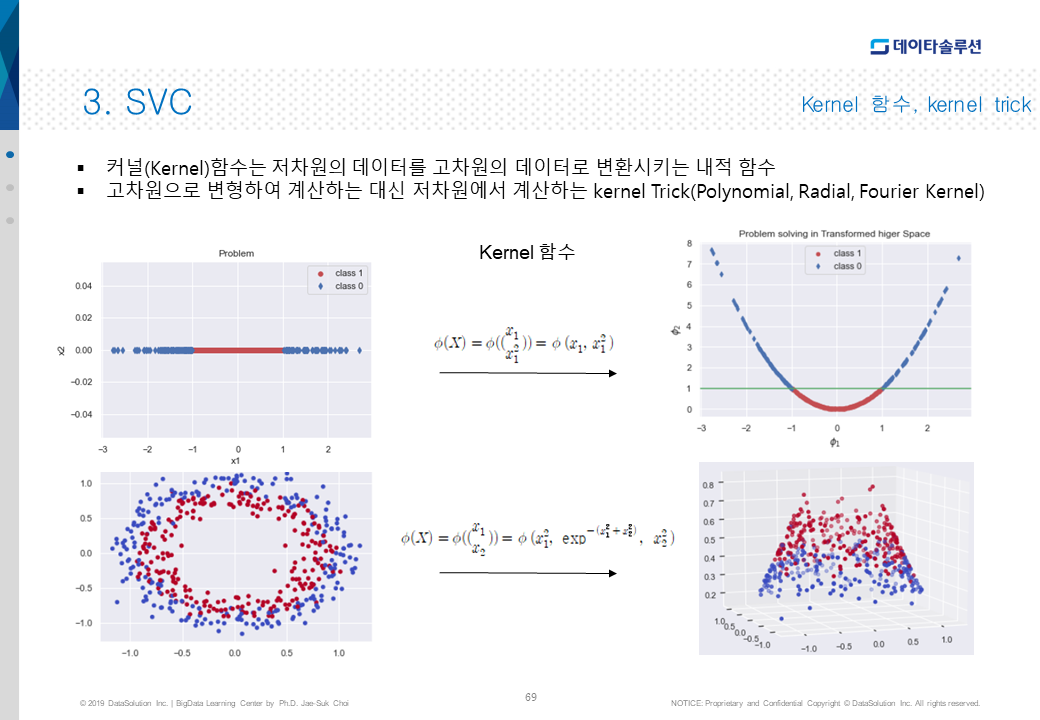

In [12]:
Image(filename='../img/슬라이드69.png', width=width, height=height)

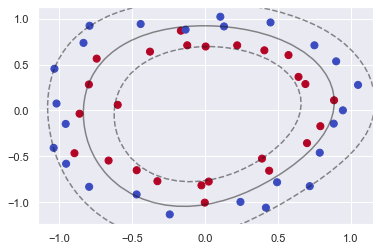

In [13]:
X, y = make_circles(n_samples=50, random_state=11, noise=0.1)
model = SVC(kernel='rbf')
model.fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='coolwarm')
plot_svc_decision_function(model);

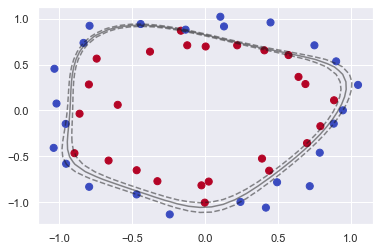

In [14]:
model = SVC(kernel='rbf', C=1E10)
model.fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='coolwarm')
plot_svc_decision_function(model);

Text(0.5, 1.0, 'C = 10.0')

Text(0.5, 1.0, 'C = 0.1')

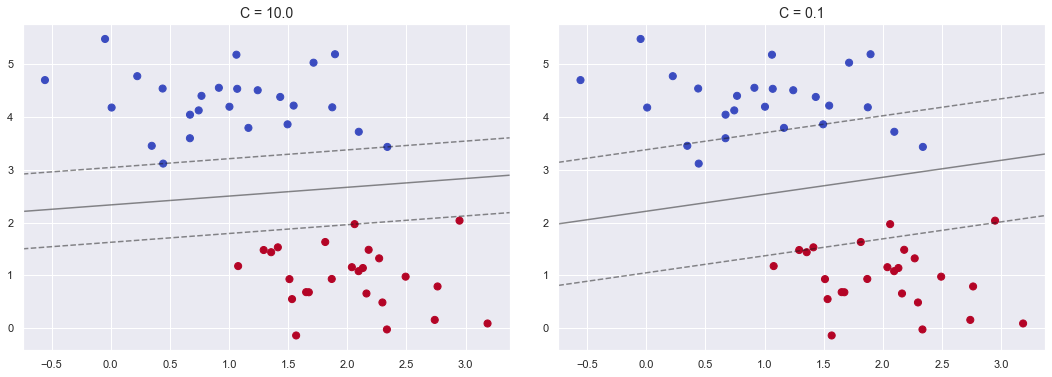

In [15]:
X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='coolwarm')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

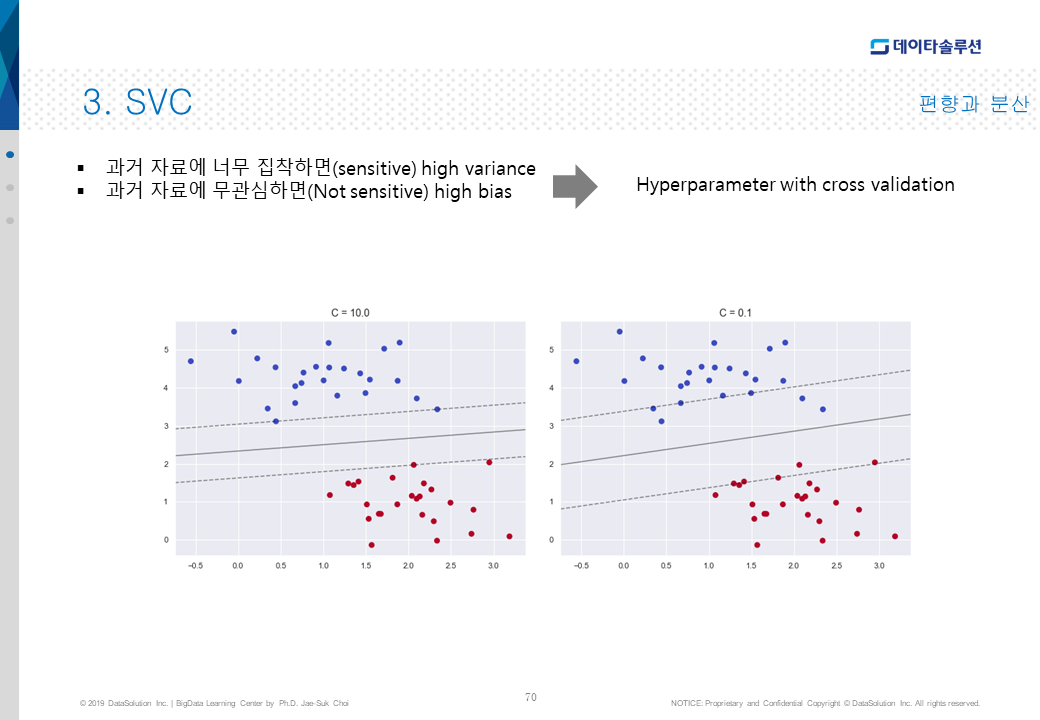

In [16]:
Image(filename='../img/슬라이드70.png', width=width, height=height)

## 데이터 불러오기

In [17]:
X = pd.read_pickle('../data/X.pkl') # 특성변수만 반영
y = pd.read_pickle('../data/y.pkl')
X.shape, y.shape
X.head()
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, 
                                                  stratify= y, random_state=11)
X_train.shape, X_test.shape
y_train.shape, y_test.shape

((4000, 78), (4000,))

,성별_1,성별_2,지역_1,지역_2,지역_3,지역_4,지역_5,지역_6,지역_7,직업_1,...,드라마_genre_7,드라마_genre_8,드라마_genre_9,드라마_genre_10,드라마_genre_11,드라마_genre_12,드라마_genre_13,드라마_genre_14,드라마_genre_15,드라마_genre_16
0,1,0,1,0,0,0,0,0,0,0,...,0.0,0.0,0.9375,0.875,0.0000,0.000,0.8125,0.0000,0.0,0.0
1,1,0,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0000,0.000,0.8750,0.000,0.0000,0.0000,0.0,0.0
2,1,0,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0000,0.000,0.0000,0.875,0.0000,0.8125,0.0,0.0
3,1,0,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0000,0.000,0.0000,0.000,0.0000,0.0000,0.0,0.0
4,1,0,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0000,0.875,0.8125,0.000,0.0000,0.0000,0.0,0.0


((3200, 78), (800, 78))

((3200,), (800,))

선형대수의 특이값 분해(SVD, singular value decomposition), 분광분해(spectral decomposition) 등으로 주성분을 추출한다 

사이킷런의 PCA 모듈에서는 특이값분해 방법으로 ‘auto’, ‘full’, ‘arpack’, ‘randomized’ 등을 옵션으로 사용할 수 있다. 

자세한 내용은 사이킷런의 ‘sklearn.decomposition.PCA’를 참고하기 바란다. 

원자료 행렬 유형에 따라 어떤 경우는 ‘X_scaled’에 무한대나 결측치가 없는데도 불구하고 ‘ValueError: array must not contain infs or NaNs’ 혹은 ‘SVD did not converge’라는 메시지가 나온다. 

이런 경우에는 ‘svd_solver='arpack' 명령어를 입력하면 특이값으로 수렴이 가능하다

In [18]:
from sklearn.decomposition import PCA
pca = PCA(svd_solver='arpack', n_components=40)
pca.fit(X)
X_pca = pca.transform(X)
print('총변동량 설명비율 (%) :', np.sum(pca.explained_variance_ratio_))

PCA(n_components=40, svd_solver='arpack')

총변동량 설명비율 (%) : 0.9480201877745487


In [19]:
from sklearn.svm import SVC
np.random.seed(1357)
kf = KFold(n_splits=5)
pca_tuple =('pca', PCA(n_components=10))
model_tuple=('svc', SVC(max_iter=1000, random_state=11))
pipe = Pipeline([pca_tuple, model_tuple])
params = {'svc__C': np.arange(0.001, 1000, 10),
          'svc__gamma': np.arange(0.001, 1000, 10),
          'svc__kernel': ['linear', 'rbf']}
grid=RandomizedSearchCV(pipe, params, cv=kf, 
                        scoring='recall_macro', verbose=True)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   14.1s finished


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('pca', PCA(n_components=10)),
                                             ('svc',
                                              SVC(max_iter=1000,
                                                  random_state=11))]),
                   param_distributions={'svc__C': array([1.00000e-03, 1.00010e+01, 2.00010e+01, 3.00010e+01, 4.00010e+01,
       5.00010e+01, 6.00010e+01, 7.00010e+01, 8.00010e+01, 9.00010e+01,
       1.00001e+02, 1.10001e+...
       7.50001e+02, 7.60001e+02, 7.70001e+02, 7.80001e+02, 7.90001e+02,
       8.00001e+02, 8.10001e+02, 8.20001e+02, 8.30001e+02, 8.40001e+02,
       8.50001e+02, 8.60001e+02, 8.70001e+02, 8.80001e+02, 8.90001e+02,
       9.00001e+02, 9.10001e+02, 9.20001e+02, 9.30001e+02, 9.40001e+02,
       9.50001e+02, 9.60001e+02, 9.70001e+02, 9.80001e+02, 9.90001e+02]),
                                        'svc__kernel': ['linear', 'rbf'

In [21]:
grid.best_estimator_

Pipeline(steps=[('pca', PCA(n_components=10)),
                ('svc',
                 SVC(C=480.001, gamma=660.001, kernel='linear', max_iter=1000,
                     random_state=11))])

              precision    recall  f1-score   support

           0       0.63      0.64      0.63       522
           1       0.30      0.29      0.30       278

    accuracy                           0.52       800
   macro avg       0.47      0.47      0.47       800
weighted avg       0.52      0.52      0.52       800



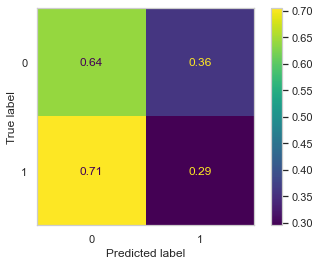

In [22]:
model = grid.best_estimator_
y_predict = model.predict(X_test)
y_scores = model.decision_function(X_test)
sns.set_style("whitegrid", {'axes.grid' : False})
print(classification_report(y_test, y_predict))
plot_confusion_matrix(model, X_test, y_test, normalize='true')

In [23]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score
auc = roc_auc_score(y_test, y_scores)
ap = average_precision_score(y_test, y_scores)
print('AUROC :', round(auc * 100, 2)); print('AP Mean :', round(ap * 100, 2))

AUROC : 45.37
AP Mean : 31.44


In [24]:
from joblib import dump, load
dump(model, '../output/svc.joblib')

['../output/svc.joblib']

## <font color = 'red'> 주성분 분석(Principal Component Analysis)

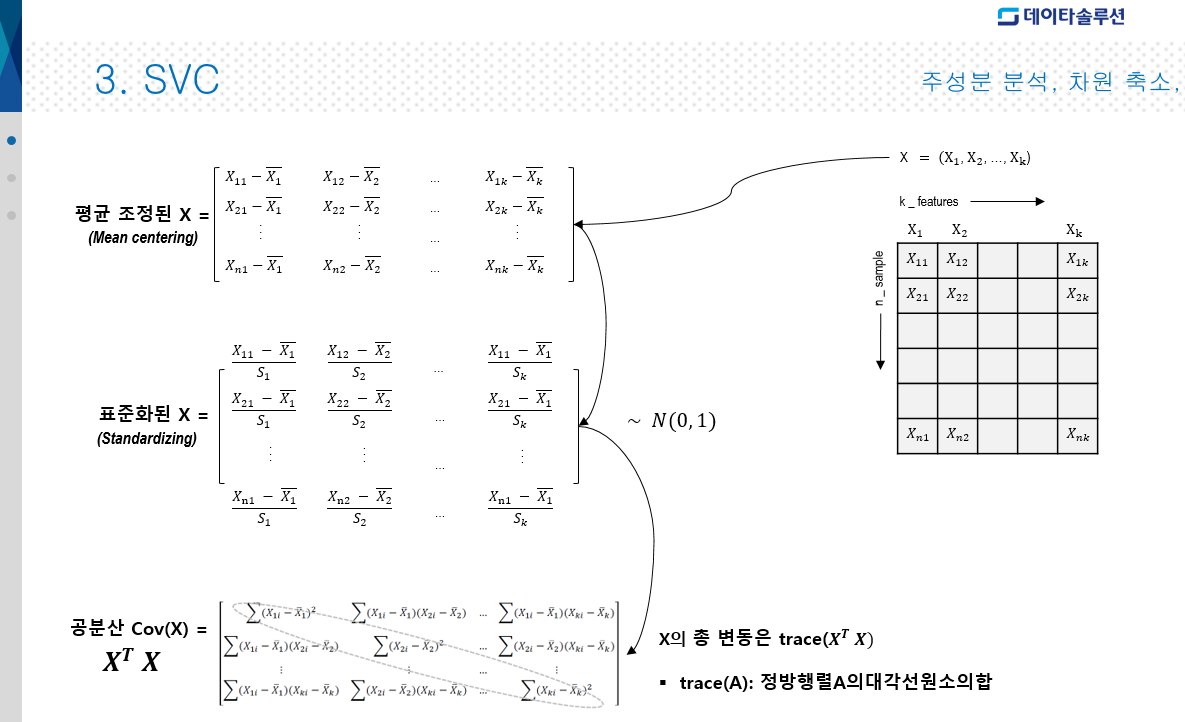

In [25]:
Image(filename='../img/pca.png', width=width, height=height)

In [26]:
X1 = np.array([int(num) for num in np.linspace(0, 15, 10)]).reshape(2,5)
X2 = np.array([int(num) for num in np.linspace(20, 55, 10)]).reshape(2,5)
X = np.concatenate((X1, X2))
X

array([[ 0,  1,  3,  5,  6],
       [ 8, 10, 11, 13, 15],
       [20, 23, 27, 31, 35],
       [39, 43, 47, 51, 55]])

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X) # 평균조정된 X
print(f'평균: {X_scaled.mean(axis=0).round(2)}, 표준편차: {X_scaled.std(axis=0)}')
X_scaled

평균: [ 0.  0. -0.  0.  0.], 표준편차: [1. 1. 1. 1. 1.]


array([[-1.14051847, -1.15611156, -1.12943277, -1.1286653 , -1.15002526],
       [-0.59579323, -0.58597435, -0.65388213, -0.67719918, -0.67415274],
       [ 0.22129463,  0.23755717,  0.29721915,  0.33859959,  0.38334175],
       [ 1.51501707,  1.50452874,  1.48609575,  1.46726488,  1.44083625]])

In [28]:
np.dot(X_scaled.T, X_scaled).round(2) # X_scaled.T@X_scaled
print(f'공분산은: {np.trace(np.dot(X_scaled.T, X_scaled))}')

array([[4.  , 4.  , 3.99, 3.99, 3.98],
       [4.  , 4.  , 4.  , 3.99, 3.98],
       [3.99, 4.  , 4.  , 4.  , 3.99],
       [3.99, 3.99, 4.  , 4.  , 4.  ],
       [3.98, 3.98, 3.99, 4.  , 4.  ]])

공분산은: 20.0


Text(0.5, 0, '주성분 개 수')

Text(0, 0.5, '총변동량 누적 설명 비율')

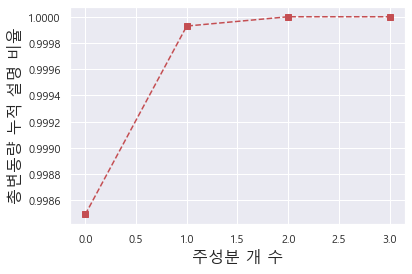

In [29]:
from sklearn.decomposition import PCA
pca = PCA().fit(X_scaled)
sns.set(); plt.rcParams['font.family']='Malgun Gothic' # 한글폰트
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'rs--')
plt.xlabel('주성분 개 수', fontsize='16')
plt.ylabel('총변동량 누적 설명 비율', fontsize='16')

In [30]:
pca = PCA(n_components=2)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)
print('총변동량 설명비율 (%) :', np.round(pca.explained_variance_ratio_*100, 2))

PCA(n_components=2)

총변동량 설명비율 (%) : [99.85  0.14]


In [31]:
(X_pca.T@X_pca).round(2)
print(f'공분산은: {np.trace(np.dot(X_pca.T, X_pca))}')
(np.trace(np.dot(X_pca.T, X_pca))/20)*100

array([[19.97,  0.  ],
       [ 0.  ,  0.03]])

공분산은: 19.998582676597618


99.99291338298809

## 3. 의사결정트리

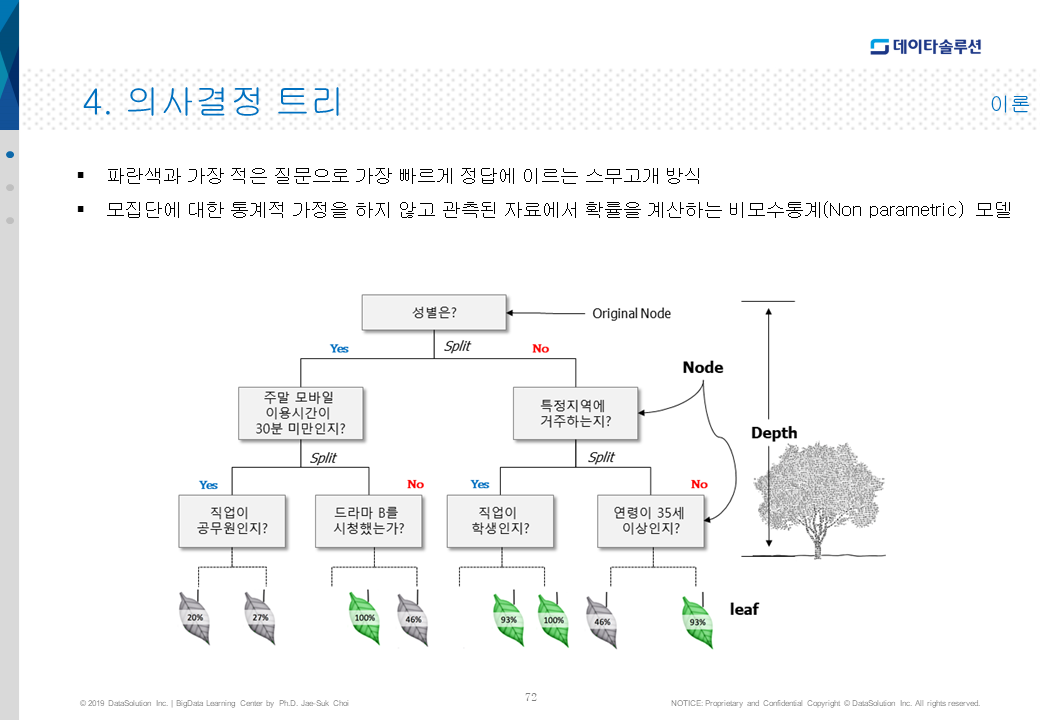

In [32]:
Image(filename='../img/슬라이드72.png', width=width, height=height)

## 데이터 불러오기

In [33]:
X = pd.read_pickle('../data/X.pkl') # 특성변수만 반영
y = pd.read_pickle('../data/y.pkl')
X.shape, y.shape
X.head()
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, 
                                                  stratify= y, random_state=11)
X_train.shape, X_test.shape
y_train.shape, y_test.shape

((4000, 78), (4000,))

,성별_1,성별_2,지역_1,지역_2,지역_3,지역_4,지역_5,지역_6,지역_7,직업_1,...,드라마_genre_7,드라마_genre_8,드라마_genre_9,드라마_genre_10,드라마_genre_11,드라마_genre_12,드라마_genre_13,드라마_genre_14,드라마_genre_15,드라마_genre_16
0,1,0,1,0,0,0,0,0,0,0,...,0.0,0.0,0.9375,0.875,0.0000,0.000,0.8125,0.0000,0.0,0.0
1,1,0,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0000,0.000,0.8750,0.000,0.0000,0.0000,0.0,0.0
2,1,0,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0000,0.000,0.0000,0.875,0.0000,0.8125,0.0,0.0
3,1,0,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0000,0.000,0.0000,0.000,0.0000,0.0000,0.0,0.0
4,1,0,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0000,0.875,0.8125,0.000,0.0000,0.0000,0.0,0.0


((3200, 78), (800, 78))

((3200,), (800,))

In [34]:
from sklearn.tree import DecisionTreeClassifier
DecisionTreeClassifier(random_state=11).get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 11,
 'splitter': 'best'}

In [35]:
params = { 
'criterion' :['gini', 'entropy'],
'splitter': ['best', 'random'],
'max_depth' : np.arange(1,10),
'min_samples_split': [0.005, 0.01, 0.05, 0.10],
'min_samples_leaf': [0.005, 0.01, 0.05, 0.10],
'max_features': ['auto', 'sqrt', 'log2'],
}

In [36]:
np.random.seed(1111)
kf = KFold(n_splits=5)
model = DecisionTreeClassifier(random_state=11)
grid = RandomizedSearchCV(model, params, cv=kf, scoring = 'recall_macro')
grid.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=DecisionTreeClassifier(random_state=11),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [0.005, 0.01, 0.05,
                                                             0.1],
                                        'min_samples_split': [0.005, 0.01, 0.05,
                                                              0.1],
                                        'splitter': ['best', 'random']},
                   scoring='recall_macro')

In [37]:
print('optimal train score: {:.3f}'.format(grid.best_score_))
print('test score: {:.3f}'.format(grid.score(X_test, y_test)))
print('optimal parameter: {}'.format(grid.best_params_))

optimal train score: 0.586
test score: 0.586
optimal parameter: {'splitter': 'best', 'min_samples_split': 0.01, 'min_samples_leaf': 0.005, 'max_features': 'auto', 'max_depth': 8, 'criterion': 'gini'}


In [38]:
best_params = grid.best_params_
tuned_params = {item[:]: best_params[item] for item in best_params}
model= DecisionTreeClassifier(random_state=11).set_params(**tuned_params)
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 0.005,
 'min_samples_split': 0.01,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 11,
 'splitter': 'best'}

In [39]:
model.fit(X_train, y_train)
print("Feature importances:\n{}".format(model.feature_importances_))
from joblib import dump, load
dump(model, '../output/dt.joblib')

DecisionTreeClassifier(max_depth=8, max_features='auto', min_samples_leaf=0.005,
                       min_samples_split=0.01, random_state=11)

Feature importances:
[0.0241753  0.         0.         0.         0.         0.
 0.35393199 0.         0.         0.         0.00037235 0.
 0.         0.00802318 0.         0.         0.         0.
 0.         0.         0.03058565 0.004667   0.         0.0106701
 0.         0.00469329 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.01049328 0.01723159 0.         0.0055009  0.         0.0149873
 0.00039594 0.02999247 0.04744543 0.         0.         0.02456356
 0.         0.         0.         0.13233905 0.         0.06940066
 0.0361777  0.         0.01377173 0.         0.         0.
 0.         0.         0.00464872 0.00416835 0.06793807 0.01930699
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.06451939 0.        ]


['../output/dt.joblib']

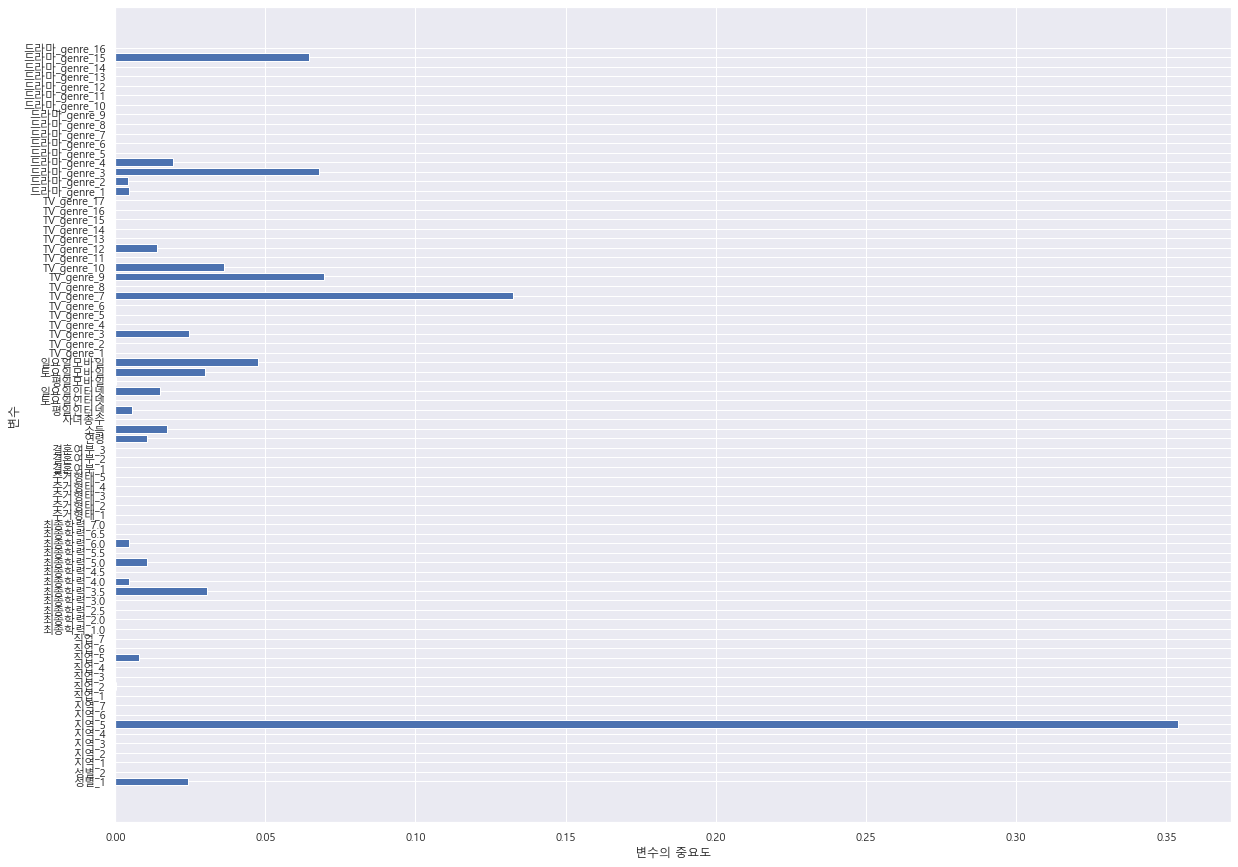

In [40]:
sns.set(); plt.rcParams['font.family']='Malgun Gothic' # 한글폰트
def plot_feature_importances(model):
    fig, ax = plt.subplots(1,1,figsize=(20,15))
    plt.barh(range(X_train.shape[1]), model.feature_importances_, align='center')
    plt.yticks(np.arange(X_train.shape[1]), X_train.columns)
    plt.xlabel('변수의 중요도')
    plt.ylabel('변수')
    plt.savefig('../output/Feature_importance') 
plot_feature_importances(model)

In [41]:
from sklearn.metrics import confusion_matrix
y_predict = grid.predict(X_test)
print(classification_report(y_test, y_predict))
confusion_matrix(y_test, y_predict)
confusion_matrix(y_test, y_predict, normalize='true').round(4)*100

              precision    recall  f1-score   support

           0       0.70      0.92      0.79       522
           1       0.63      0.25      0.36       278

    accuracy                           0.69       800
   macro avg       0.67      0.59      0.58       800
weighted avg       0.68      0.69      0.64       800



array([[482,  40],
       [209,  69]], dtype=int64)

array([[92.34,  7.66],
       [75.18, 24.82]])

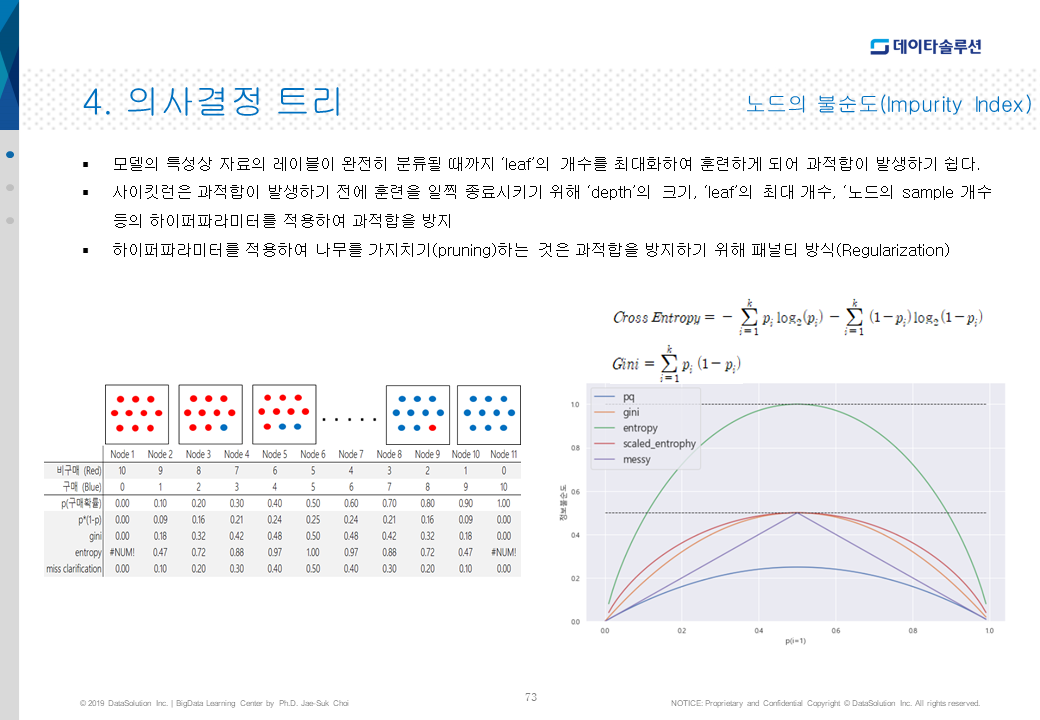

In [42]:
Image(filename='../img/슬라이드73.png', width=width, height=height)

## 정보 불순도(Impurity)
$$\Large  entropy \ score = - \sum_{i=1}^{N} (p (1-p) + q (1-q)) $$

In [43]:
def pq(p):
   return p*(1 - p)

def gini(p):
   return (p)*(1 - (p)) + (1 - p)*(1 - (1-p))

def cross_entropy(p):
   return - p*np.log2(p) - (1 - p)*np.log2((1 - p))

def miss_clear(p):
   return 1 - np.max([p, 1 - p])

<Figure size 720x360 with 0 Axes>

(0.0, 1.1)

Text(0.5, 0, 'p(i=1)')

Text(0, 0.5, '정보불순도')

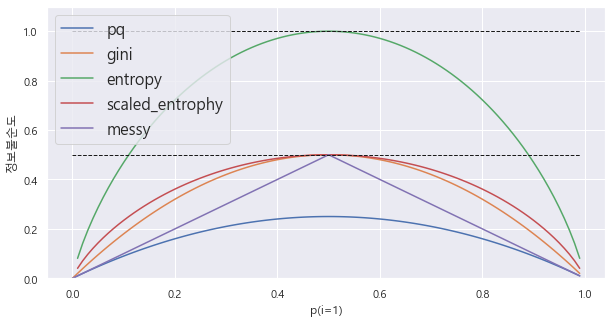

In [44]:
plt.figure(figsize=(10, 5)); plt.rc('legend', fontsize=16)
x = np.arange(0.0, 1.0, 0.01)
plt.plot(x, pq(x), label='pq'); plt.legend()
plt.plot(x, gini(x), label='gini'); plt.legend() # pq*2(이진분류)
plt.plot(x, [cross_entropy(p) if p != 0 else None for p in x],  label='entropy')
plt.legend()
plt.plot(x, cross_entropy(x)*0.5, label='scaled_entrophy'); plt.legend()
plt.plot(x, [miss_clear(i) for i in x], label='messy'); plt.legend()
plt.plot(x, [0.5]*x.shape[0], linewidth=1, color='k', linestyle='--')
plt.plot(x, [1.0]*x.shape[0], linewidth=1, color='k', linestyle='--')
plt.ylim([0, 1.1]); plt.xlabel('p(i=1)'); plt.ylabel('정보불순도')

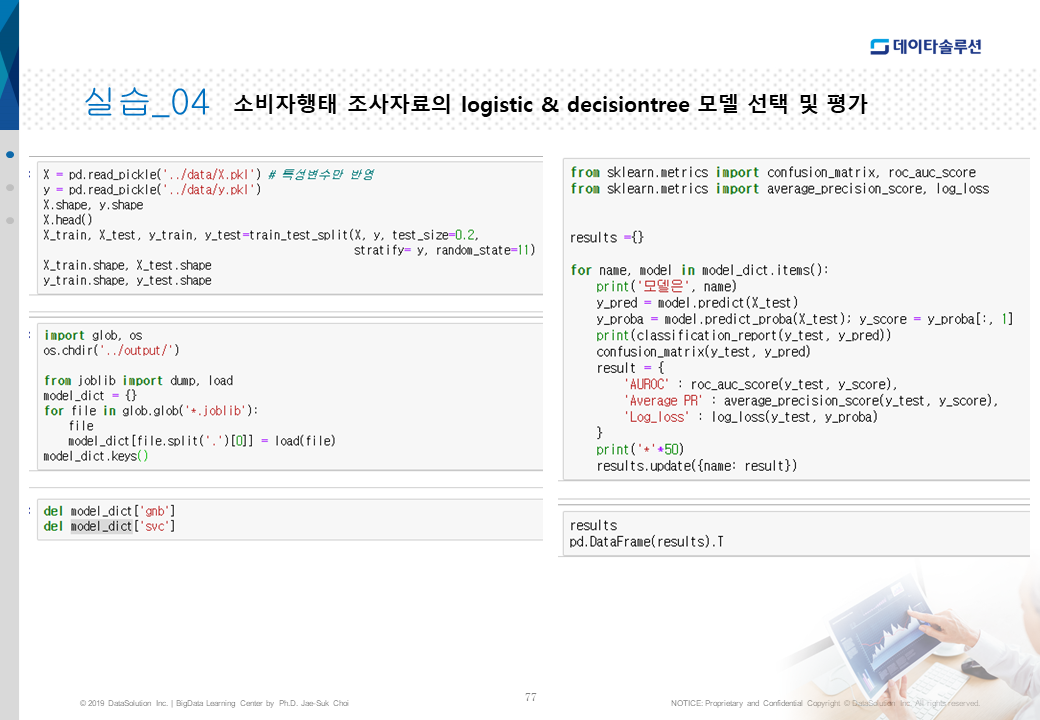

In [45]:
Image(filename='../img/슬라이드77.png', width=width, height=height)

## End